In [1]:
import pandas as pd
import os

In [2]:
path_fft = "../../results/raw3/FFT/"
path_nlp = "../../results/raw3/nlp_methods/"
path_properties = "../../results/raw3/properties/"

In [3]:
list_results_fft = os.listdir(path_fft)

list_df_fft = []

for element in list_results_fft:
    df = pd.read_csv("{}{}".format(path_fft, element))
    df['Encoding method'] = element.split(".")[0]
    df['Strategy'] = 'FFT'
    list_df_fft.append(df)

df_fft = pd.concat(list_df_fft, axis=0)

In [4]:
list_results_nlp = os.listdir(path_nlp)

list_df_nlp = []

for element in list_results_nlp:
    df = pd.read_csv("{}{}".format(path_nlp, element))
    df['Encoding method'] = element.split(".")[0]
    df['Strategy'] = 'NLP'
    list_df_nlp.append(df)

df_nlp = pd.concat(list_df_nlp, axis=0)

In [5]:
list_results_properties = os.listdir(path_properties)

list_df_properties = []

for element in list_results_properties:
    df = pd.read_csv("{}{}".format(path_properties, element))
    df['Encoding method'] = element.split(".")[0]
    df['Strategy'] = 'Properties'
    list_df_properties.append(df)

df_properties = pd.concat(list_df_properties, axis=0)

In [6]:
df_concat = pd.concat([df_nlp, df_fft, df_properties], axis=0)
df_concat = df_concat.reset_index()

In [7]:
df_concat = df_concat.sort_values(by=['test_r2'], ascending=False)
df_concat = df_concat.loc[df_concat['test_r2']>0]

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

<AxesSubplot: xlabel='test_r2', ylabel='Strategy'>

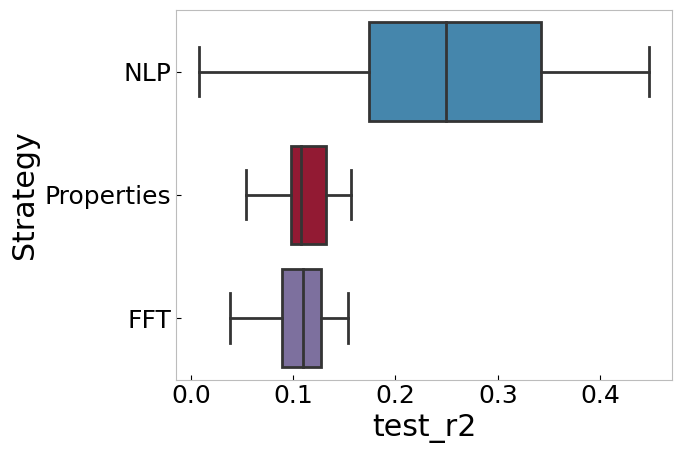

In [9]:
sns.boxplot(data=df_concat, x='test_r2', y='Strategy', showfliers=False)

<AxesSubplot: xlabel='test_r2', ylabel='Strategy'>

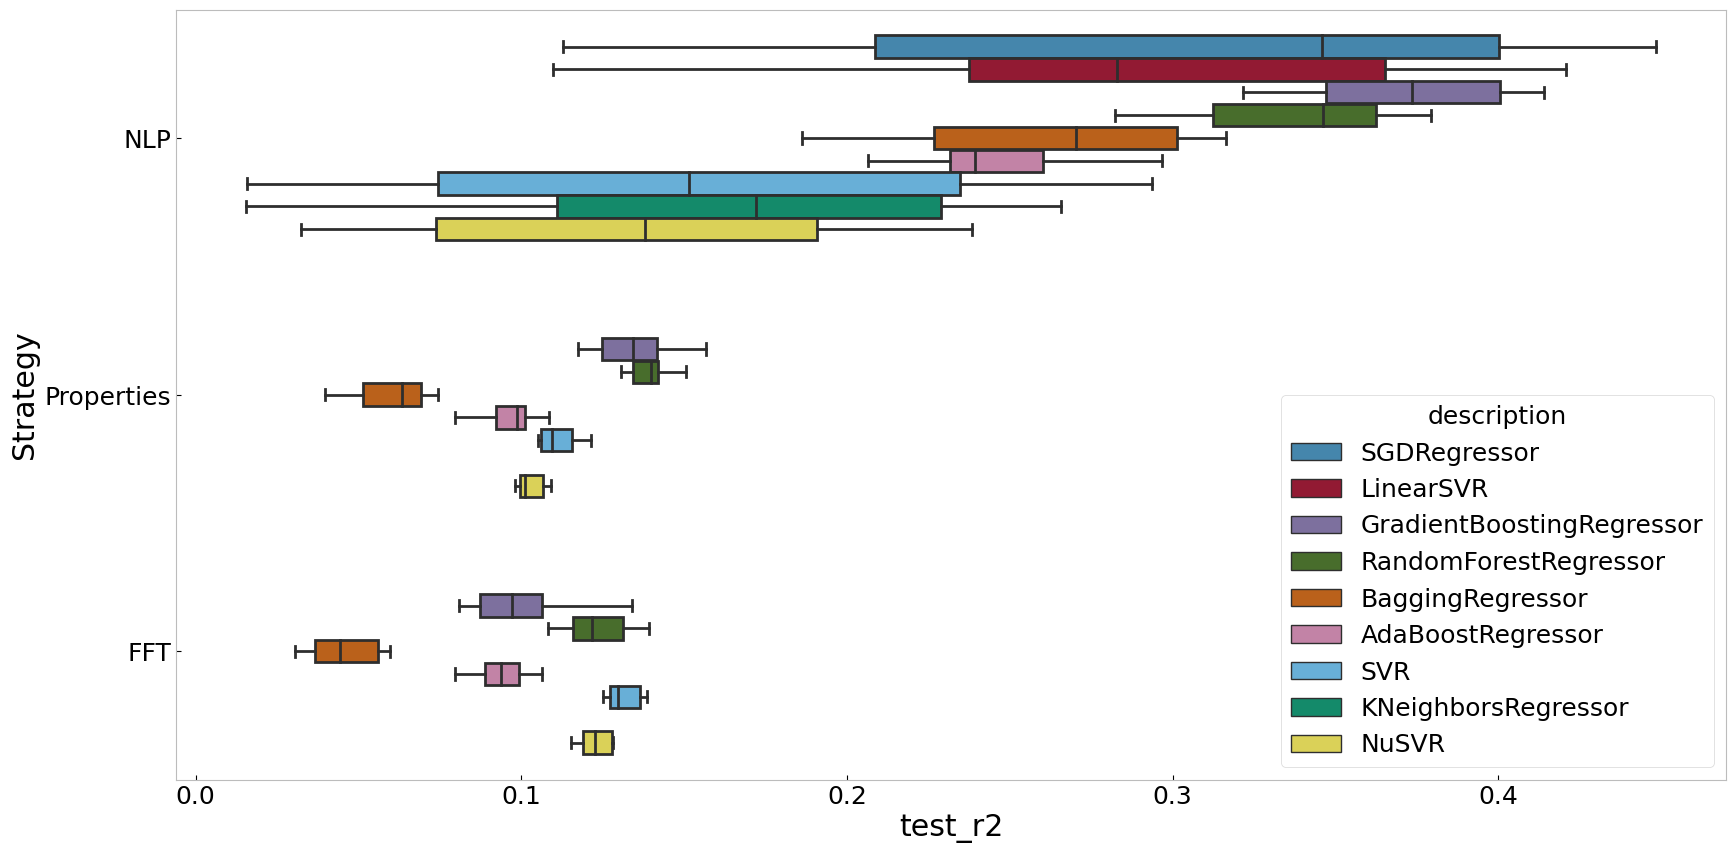

In [10]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=df_concat, x='test_r2', y='Strategy', hue='description', showfliers=False)

In [11]:
filter_nlp= df_concat.loc[df_concat['Strategy'] == 'NLP']
filter_fft= df_concat.loc[df_concat['Strategy'] == 'FFT']
filter_properties= df_concat.loc[df_concat['Strategy'] == 'Properties']

<AxesSubplot: xlabel='test_r2', ylabel='Encoding method'>

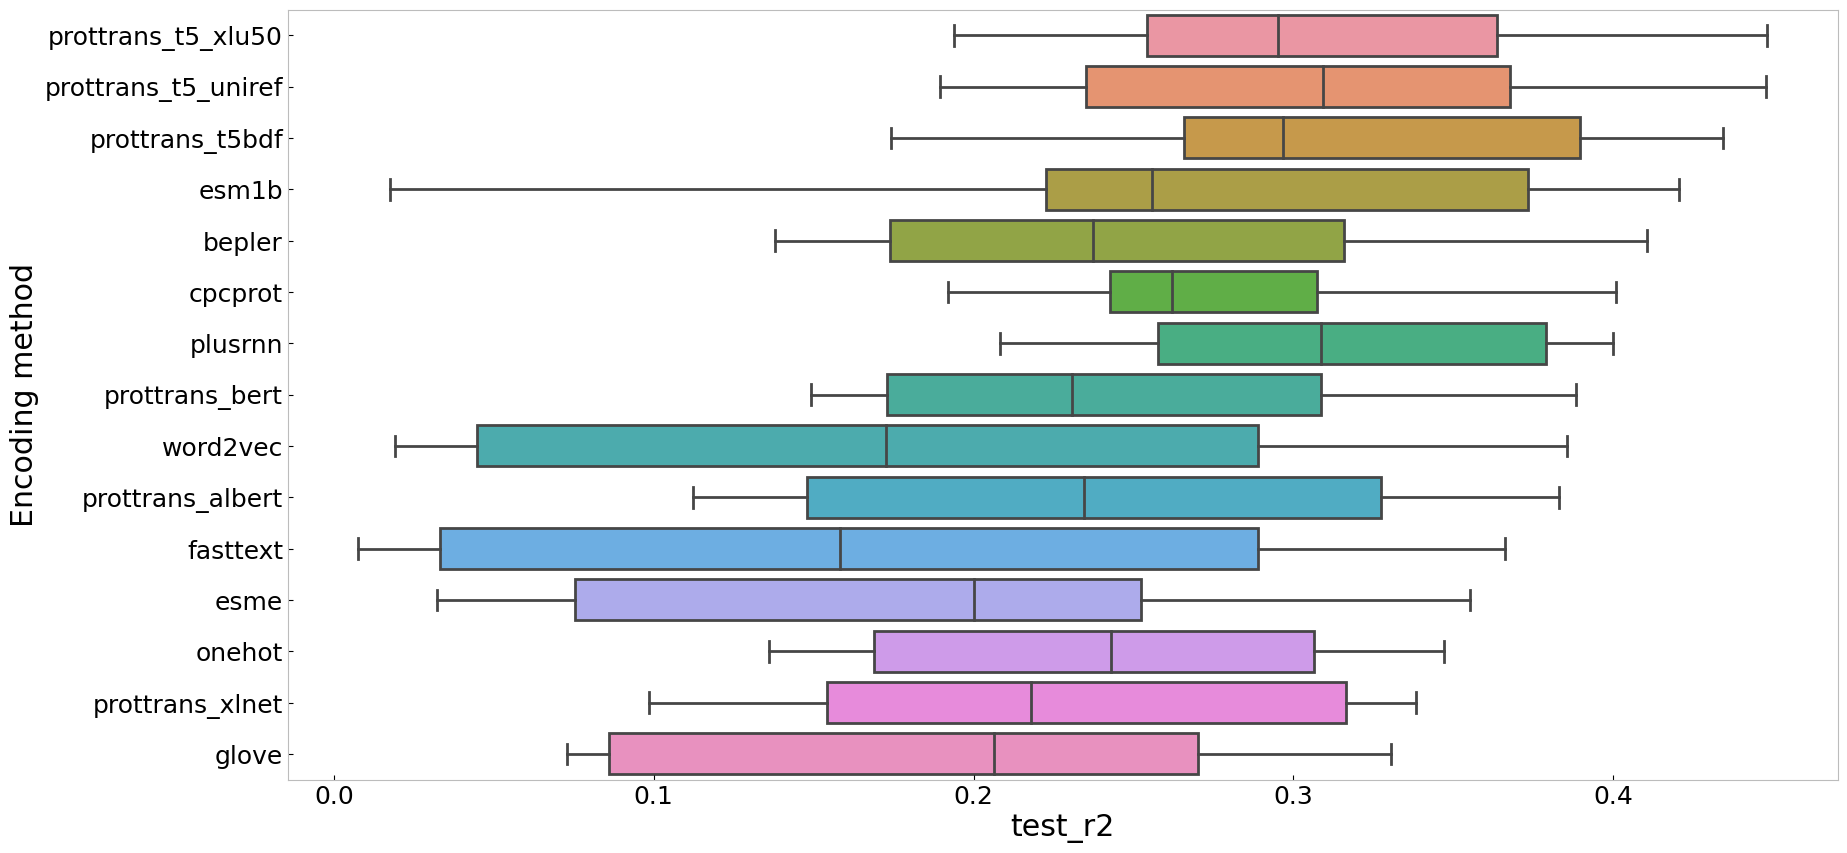

In [12]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=filter_nlp, x='test_r2', y='Encoding method', showfliers=False)

<AxesSubplot: xlabel='test_r2', ylabel='Encoding method'>

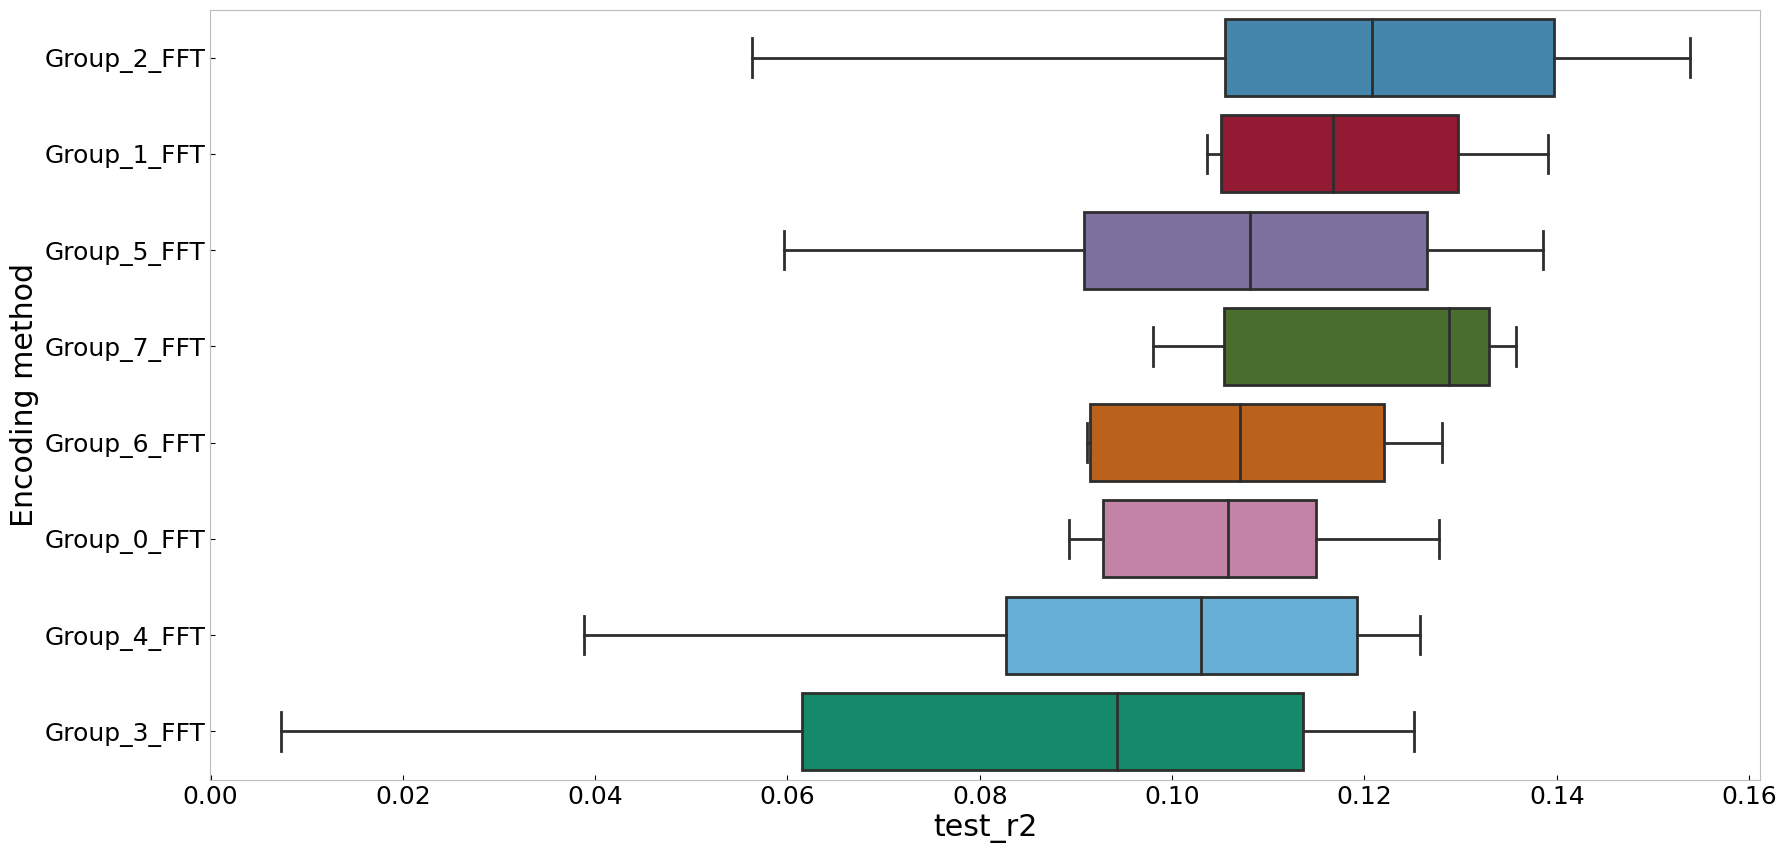

In [13]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=filter_fft, x='test_r2', y='Encoding method', showfliers=False)

<AxesSubplot: xlabel='test_r2', ylabel='Encoding method'>

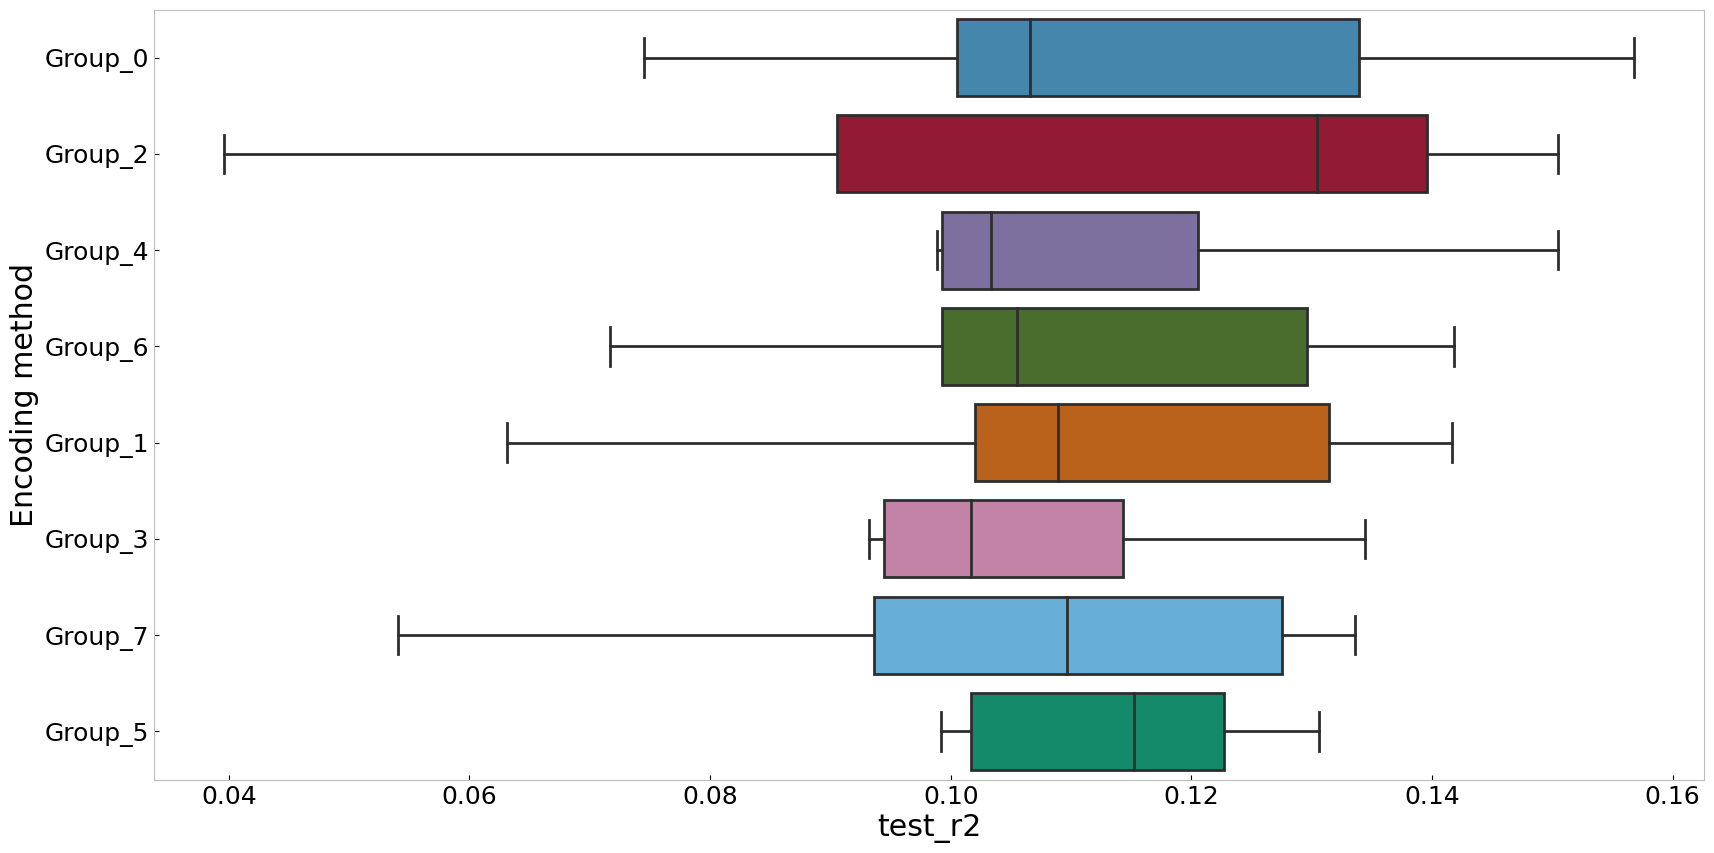

In [14]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=filter_properties, x='test_r2', y='Encoding method', showfliers=False)

In [19]:
df_concat = df_concat.sort_values(by=['r2_value'], ascending=False)
df_concat[['description', 'r2_value', 'Encoding method']][:5]

,description,r2_value,Encoding method
59,SGDRegressor,0.435426,prottrans_t5_uniref
86,GradientBoostingRegressor,0.434004,prottrans_t5_xlu50
89,SGDRegressor,0.433858,prottrans_t5_xlu50
56,GradientBoostingRegressor,0.429016,prottrans_t5_uniref
18,LinearSVR,0.416964,esm1b
